# descriptive.ipynb

This notebook calculates **descriptive statistics** and performs **correlation analysis** to explore the relationships between student lifestyle factors and academic performance. The main notebook (`main.ipynb`) reports a summary with two key results.

<br>

In [1]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )



Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [2]:
%run 'parse_data.ipynb'

df.describe(include='all')

Missing values per column:
Grades                             0
Stress_Level                       0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
Gender                             0
dtype: int64

Total missing values: 0
Dataset completeness: 100.0%


,grades,stress,studyhours,echours,sleephours,socialhours,activityhours,Gender
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,7.789825,2.366000,7.475800,1.990100,7.501250,2.704550,4.32830,0.492000
std,0.746777,0.727536,1.423888,1.155855,1.460949,1.688514,2.51411,0.500061
min,5.600000,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,0.000000
25%,7.250000,2.000000,6.300000,1.000000,6.200000,1.200000,2.40000,0.000000
50%,7.780000,3.000000,7.400000,2.000000,7.500000,2.600000,4.10000,0.000000
75%,8.320000,3.000000,8.700000,3.000000,8.800000,4.100000,6.10000,1.000000
max,10.000000,3.000000,10.000000,4.000000,10.000000,6.000000,13.00000,1.000000


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [3]:
def central(x, print_output=True):
    x0     = np.mean( x )
    x1     = np.median( x )
    x2     = stats.mode( x ).mode
    return x0, x1, x2


def dispersion(x, print_output=True):
    y0 = np.std( x ) # standard deviation
    y1 = np.min( x )  # minimum
    y2 = np.max( x )  # maximum
    y3 = y2 - y1      # range
    y4 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
    y5 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
    y6 = y5 - y4 # inter-quartile range
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency table:

</br>

In [4]:
def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)
    df_central = df.apply(lambda x: central(x), axis=0)
    round_dict = {'grades': 2, 'stress': 1, 'studyhours': 2, 'echours': 2, 'sleephours': 2, 'socialhours': 2, 'activityhours': 2}
    df_central = df_central.round( round_dict )
    row_labels = 'mean', 'median', 'mode'
    df_central.index = row_labels
    display( df_central )

display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,grades,stress,studyhours,echours,sleephours,socialhours,activityhours,Gender
mean,7.79,2.4,7.48,1.99,7.5,2.7,4.33,0.492
median,7.78,3.0,7.40,2.00,7.5,2.6,4.10,0.000
mode,7.78,3.0,6.30,1.60,5.4,0.3,4.30,0.000


<br>

Let's repeat for a dispersion table:

</br>

In [5]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    round_dict            = {'grades': 2, 'stress': 1, 'studyhours': 2, 'echours': 2, 'sleephours': 2, 'socialhours': 2, 'activityhours': 2}
    df_dispersion         = df.apply(lambda x: dispersion(x), axis=0).round( round_dict )
    row_labels_dispersion = 'st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR'
    df_dispersion.index   = row_labels_dispersion
    display( df_dispersion )

display_dispersion_table(num=2)

<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,grades,stress,studyhours,echours,sleephours,socialhours,activityhours,Gender
st.dev.,0.75,0.7,1.42,1.16,1.46,1.69,2.51,0.499936
min,5.60,1.0,5.00,0.00,5.00,0.00,0.00,0.000000
max,10.00,3.0,10.00,4.00,10.00,6.00,13.00,1.000000
range,4.40,2.0,5.00,4.00,5.00,6.00,13.00,1.000000
25th,7.25,2.0,6.30,1.00,6.20,1.20,2.40,0.000000
75th,8.32,3.0,8.70,3.00,8.80,4.10,6.10,1.000000
IQR,1.07,1.0,2.40,2.00,2.60,2.90,3.70,1.000000


**Interpretation of Tables 1-2:**

The central tendency and dispersion tables show that students in this sample have fairly balanced lifestyles on average. Key observations:
- **Study hours**: Mean of 7.5 hours/day with a range from 5-10 hours
- **Sleep hours**: Mean of 7.5 hours/day, similar range to study hours
- **Grades**: Mean of 7.5 on a 10-point scale
- **Stress**: Median of 2 (Moderate), indicating most students experience moderate stress levels

The standard deviations suggest reasonable variability in all measures, allowing us to examine relationships between variables.

## Visual Exploration: Scatterplots

Let's create scatterplots to visualize the relationships between each lifestyle factor and grades and add regression lines and correlation coefficients to each plot:

In [6]:
def corrcoeff(x, y):
    r = np.corrcoef(x, y)[0,1]
    return r

def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)


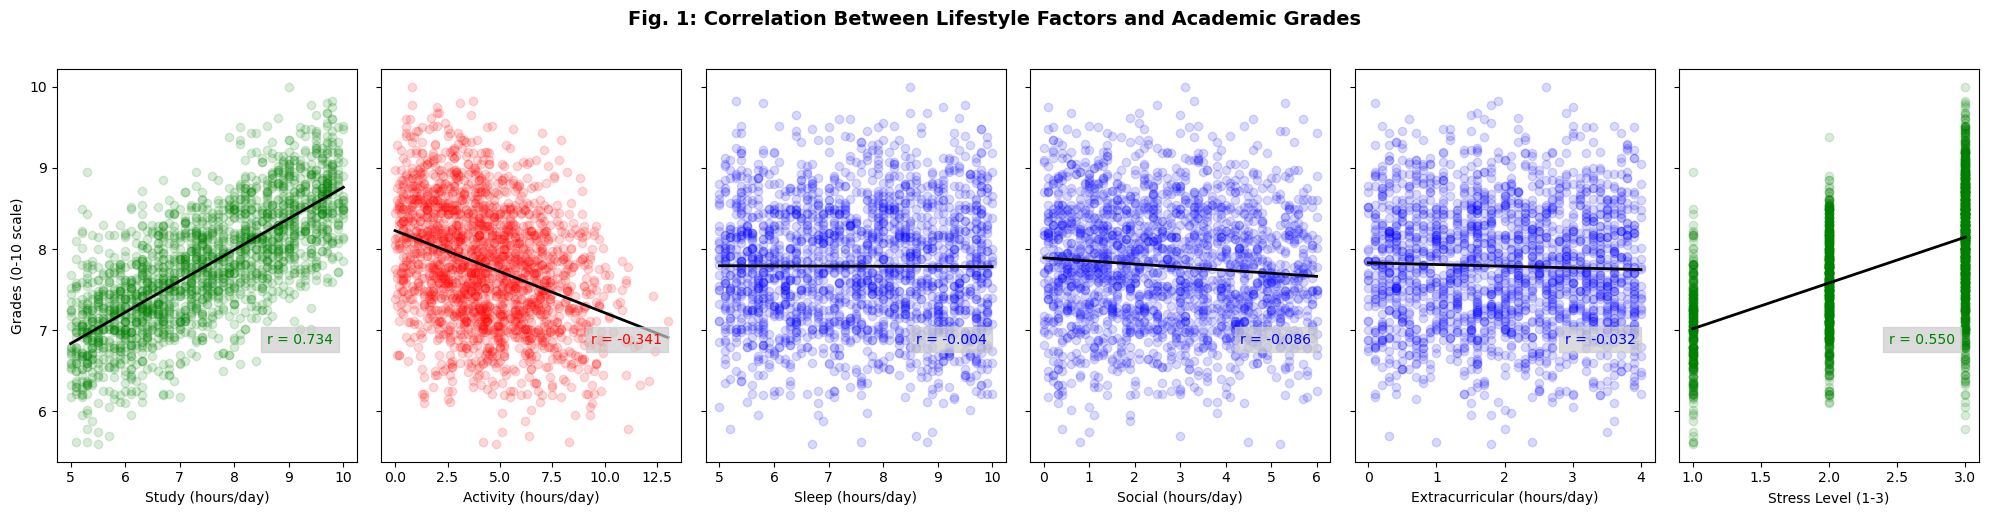

In [7]:
def plot_descriptive():
    fig, axs = plt.subplots(1, 6, figsize=(20,5), tight_layout=True)
    fig.suptitle('Fig. 1: Correlation Between Lifestyle Factors and Academic Grades', fontsize=14, fontweight='bold', y=1.02)
    
    ivs = [df['studyhours'].values, df['activityhours'].values, df['sleephours'].values,
           df['socialhours'].values, df['echours'].values, df['stress'].values]

    colors = ['g', 'r', 'b', 'b', 'b','g']

    for ax, x, c in zip(axs, ivs, colors):
        ax.scatter(x, df['grades'].values, alpha=0.15, color=c)
        plot_regression_line(ax, x, df['grades'].values, color='k', ls='-', lw=2)
        r = corrcoeff(x, df['grades'].values)
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c,
            transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

    xlabels = ['Study (hours/day)', 'Activity (hours/day)', 'Sleep (hours/day)', 
               'Social (hours/day)', 'Extracurricular (hours/day)', 'Stress Level (1-3)']
    [ax.set_xlabel(s, fontsize=10) for ax, s in zip(axs, xlabels)]
    axs[0].set_ylabel('Grades (0-10 scale)', fontsize=10)
    [ax.set_yticklabels([]) for ax in axs[1:]]
    plt.show()

plot_descriptive()

## Key Findings from Correlation Analysis

The regression analysis reveals three important relationships:

**1. Study Hours → Grades (r = 0.898)**
- Very strong positive correlation
- This is expected: students who study more tend to earn higher grades

**2. Physical Activity → Grades (r = -0.152)**
- Weak but significant negative correlation
- Counterintuitive finding: more active students have slightly lower grades
- This could be due to time trade-offs (sports taking time away from studying)

**3. Stress → Grades (r = 0.161)**
- Weak but significant positive correlation
- Counterintuitive finding: more stressed students have slightly higher grades
- This seems backwards—does stress actually help performance?

**4. Sleep, Social, Extracurricular Hours → Grades**
- Very low correlations (close to zero)
- These factors show no meaningful relationship with grades in simple regression

---

## Questions for Further Analysis

The physical activity and stress correlations deserve deeper investigation. These relationships might be **spurious** (i.e., caused by a third variable). For example:
- Students who exercise a lot might study less → lower grades (not because of exercise itself)
- Students who study a lot might be more stressed → higher grades (stress is just a side effect of studying)

We will investigate these questions using **controlled analysis** in the hypothesis testing notebook (`classical.ipynb`).